<a href="https://colab.research.google.com/github/clmra93/Bootcamp-DataLab-E-Safra/blob/main/C%C3%B3pia_Final_de_DATALAB_CASE_01_Obten%C3%A7%C3%A3o_e_an%C3%A1lise_de_dados_da_CVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cópia de colab para case bootcamp Trading com Dados e Banco Safra.

Fiz algumas alterações no colab, como adição de informações e detalhes para facilitar os estudos. Todas as informações adicionadas por mim são precedidas de (CLMRA93) para identificação.


<img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "400">

Neste tópico acima, para indexar a imagem da trading com dados, foi usado um link para extração da mesma, com a seguinte configuração:
<    img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "400"    >


As <> para definir o que vai ser modificado dentro do campo de código.


img define que será uma imagem


src define a source, seguido de = link para definir de onde será retirada a imagem a ser utilizada no local.


widht define a largura da imagem, que no referido caso, é de 400.

# **Como obter e analisar dados de fundos de investimento**

*DataLab - Fevereiro/2024*

Nesta aula, vamos obter dados de fundos de investimento direto da fonte: o portal de dados da CVM.

Vamos processar estes dados para posteriormente analisá-los.

Queremos responder algumas perguntas importantes, como:

1. Qual fundo do Brasil tem o maior PL (patrimônio líquido)?
2. Como obter a variação da cota para um fundo específico?
3. Como recuperar dados de um fundo específico sabendo apenas o seu nome?
4. Qual o fundo que teve a cota que mais subiu?
5. Qual o fundo que teve a cota que mais caiu?

Sobre a CVM: https://www.gov.br/cvm/pt-br/acesso-a-informacao-cvm/institucional/sobre-a-cvm






---







Uma das maiores dificuldades em lidar com dados da CVM é pela forma em que eles são disponibilizados.

A CVM disponibiliza diversos dados do mercado financeiro nacional, como dados cadastrais, dos balanços e demonstrativos das empresas, demonstrativos de fundos imobiliários, dados de desempenho de fundos multimercado, dentre outros.

Plataforma de dados da CVM: https://dados.cvm.gov.br/

**O que encontramos lá dentro?**

Normalmente estes dados são disponibilizados como arquivos zipados (.zip) e dentro destas pastas zipadas nós encontramos um ou vários arquivos .csv.

E daí que vem o problema. Se precisarmos analisar vários destes arquivos ao mesmo tempo, precisamos baixá-los, para depois descompactá-los e juntá-los em algum lugar, como em uma planilha do Excel.

Só então é que conseguimos organizar os dados, ajustar o formato das colunas e realizar alguma análise.

Para ficar mais claro, aí vai um exemplo:
https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Este é o repositório da CVM que contém os dados de cotas para todos os fundos do Brasil.

Repare que cada link é o arquivo para um determinado mês de um determinado ano... e cada um desses é um .zip contendo um .csv único! Imagine agora que você quisesse analisar o desempenho da cota de um fundo em um período amplo de tempo, como alguns anos...

Você teria que baixar um por um desses arquivos, depois juntar tudo, ou seja, literalmente empilhar para ter uma base de dados só!

**E qual a solução?**

Felizmente, o Python nos ajuda muito neste processo.

Existem algumas bibliotecas que vão nos ajudar a obter, processar e analisar esses dados.


Por exemplo, com a biblioteca pandas, podemos obter os dados diretamente, sem a necessidade de baixar ou descompactar o .zip.

Acompanhe!

# **0. Noções básicas**

### O que é um fundo de investimento?

**O que é um Fundo de Investimentos?**
Um fundo de investimentos funciona como uma espécie de condomínio.

Dentro de um fundo temos vários segmentos:

Existe a empresa administradora do fundo, o gestor, os profissionais que fazem a auditoria sobre os números do fundo e, por fim, mas não menos importante, os investidores, ou nesse caso, os cotistas.

Para simplificar a compreensão de um fundo, é sempre válido pensar nele exatamente como um condomínio:

As pessoas vivem juntas em um mesmo terreno, porque assim várias coisas acabam sendo divididas. Os custos para manutenção são compartilhados, a segurança, a área de lazer e diversas outras áreas.

O fundo de investimento parte da mesma prerrogativa: Porque investir sozinho, se o investidor pode fazer isso com mais pessoas, utilizando muito mais recursos e contratando um profissional ultra qualificado para cuidar de todo esse dinheiro?

É por isso que, em grande parte, os fundos funcionam como condomínios.

Fonte: https://maisretorno.com/portal/termos/f/fundo-de-investimentos

<center><img src = "https://blog.yubb.com.br/wp-content/uploads/2017/12/01.12.2017-fundos-de-investimento.png?raw=true" width = "500">

Fonte: https://blog.yubb.com.br/entenda-os-fundos-de-investimentos/

Ferramentas importantes para ajudar a analisar e comparar fundos de investimento

Portal de dados Anbima
https://data.anbima.com.br/

Mais Retorno
https://maisretorno.com/comparacao-fundos



### O que faremos na nossa aula?

Vamos começar a nossa extração explorando as páginas da CVM que tem as informações que serão extraídas.

É muito importante que você adquira familiaridade com a página de dados abertos da CVM: https://dados.cvm.gov.br/

É lá que estão contidas informações importantes no mercado financeiro, como demonstrativos e balanços de empresas de capital aberto, informações cadastrais e de desempenho de fundos de investimento, dentre outros.

Nossa aula aqui será dividida em dois momentos principais. Primeiramente, vamos buscar as informações diárias de desempenho dos fundos, e posteriormente buscaremos também os dados cadastrais destes fundos. A partir disto, faremos algumas análises.

Para dados de desempenho dos fundos:

https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/

Para dados cadastrais dos fundos:

http://dados.cvm.gov.br/dados/FI/CAD/DADOS/

# **1. Extração e processamento dos dados de desempenho**

## 1.1. Importação das bibliotecas

In [1]:
import pandas as pd

(CLMRA93)O import é usado para importar uma biblioteca, que nesse caso é o pandas, uma biblioteca de Python.

## 1.2. Captura dos dados

In [2]:
link = 'https://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202401.zip'

(CLMRA93) Aqui foi atribuido uma variável. A variável se chama link, e a sua atribuição está entre aspas, para definir a variável.

Neste caso, foi utilizado o link de dados da CVM (Convenção de valores e mobiliários - orgão que monitora e regulamenta o mercado financeiro), para ser realizada a extração de dados para o estudo.

In [3]:
informes_diarios = pd.read_csv(link, sep = ';', compression = 'zip')
informes_diarios.head()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
0,FI,00.017.024/0001-53,2024-01-02,1136699.13,34.298860,1139708.10,0.0,0.0,1
1,FI,00.017.024/0001-53,2024-01-03,1137245.82,34.312303,1140154.80,0.0,0.0,1
2,FI,00.017.024/0001-53,2024-01-04,1137741.93,34.326023,1140610.71,0.0,0.0,1
3,FI,00.017.024/0001-53,2024-01-05,1138240.64,34.338221,1141016.02,0.0,0.0,1
4,FI,00.017.024/0001-53,2024-01-08,1138427.98,34.350495,1141423.89,0.0,0.0,1


(CLMRA93) Aqui foi definido outra variável, informes_diarios.

À variável informes_diarios, é atribuida que será realizada a leitura através da biblioteca importada.

pd se refere a biblioteca importada, e .read a função a ser executada, que no caso será de leitura.

_csv define o tipo de arquivo que será lido.

Entre parenteses, aparece as especificações desse arquivo, define que o arquivo está atribuido na variável link.

sep define o tipo de separação das colunas no arquivo. O arquivo csv se refere a um arquivo excel, e por conveção um arquivo excel, tem suas colunas separadas por ;, o que está especificado em sep.

compression informa o tipo de arquivo que será usado. No caso referido é um arquivo de extensão .zip

Em seguida é dado o comando informes_diarios.head() que define que a variável informes_diarios seja exibida em formato de tabela, dataframe, através do método head, que mostra por padrão as 5 primeiras linhas do seu dataframe. Caso queira que seja mostrado mais linhas, podem ser especificadas a quantidade entre parênteses.

In [4]:
informes_diarios.dtypes

TP_FUNDO          object
CNPJ_FUNDO        object
DT_COMPTC         object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST           int64
dtype: object

(CLMRA93) Neste comando, o método dtypes, mostra o tipo de valor que a variável armazena. Podendo ser um objeto, um ponto flutuante (float), ou até mesmo um número inteiro (int).

In [5]:
informes_diarios.shape

(567668, 9)

(CLMRA93) Aqui temos o método/ atríbuto shape, que irá mostrar a quantidade de linhas e colunas presentes do arquivo chamado pela variável informes_diarios.

In [6]:
informes_diarios.DT_COMPTC.unique()

array(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
       '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
       '2024-01-12', '2024-01-15', '2024-01-16', '2024-01-17',
       '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
       '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
       '2024-01-30', '2024-01-31', '2024-01-01'], dtype=object)

(CLMRA93) Aqui analisamos a coluna DT_COMPTC, com o método/ atríbuto unique, que vai mostrar os dados que constam na coluna referida, e o tipo de dado que tem nela. Através desse comando conseguimos ver os dias que estão constando na tabela.

In [7]:
informes_diarios[informes_diarios['DT_COMPTC'] == '2024-01-31']

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
21,FI,00.017.024/0001-53,2024-01-31,1.143345e+06,34.559634,1.145606e+06,0.0,0.00,1
43,FI,00.068.305/0001-35,2024-01-31,3.782584e+07,35.665634,3.781537e+07,0.0,15484.51,5992
65,FI,00.071.477/0001-68,2024-01-31,1.648170e+09,12.720100,1.648031e+09,17084.8,13217676.57,45157
87,FI,00.073.041/0001-08,2024-01-31,9.202277e+06,37.575153,9.186091e+06,0.0,0.00,787
109,FI,00.083.181/0001-67,2024-01-31,1.898866e+10,919.066498,1.898839e+10,0.0,0.00,4
...,...,...,...,...,...,...,...,...,...
567579,FI,97.548.164/0001-90,2024-01-31,6.210400e+07,0.158840,6.162196e+07,0.0,0.00,1
567601,FI,97.548.167/0001-23,2024-01-31,3.716845e+09,4.938655,3.947038e+09,410000.0,0.00,11
567623,FI,97.711.801/0001-05,2024-01-31,9.222887e+07,3.150975,9.008825e+07,0.0,0.00,1
567645,FI,97.929.197/0001-80,2024-01-31,1.289389e+08,5.928593,1.288278e+08,0.0,0.00,12


(CLMRA93) Aqui selecionamos um único dia para fazer a analise. Informando [informes_diarios['DT_COMPTC'] == '2024-01-31'] selecionamos que queremos as informações desse dia, dentro dessa coluna, nessa tabela.

In [8]:
comparativo = informes_diarios[informes_diarios['DT_COMPTC'] == '2024-01-31']

(CLMRA93) Aqui coloca a mesma tabela em uma nova variável, chamada comparativo.

In [9]:
comparativo.sort_values('VL_PATRIM_LIQ')

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
260533,FI,32.222.977/0001-40,2024-01-31,-1.644582e+07,-569.901894,-1.650817e+07,0.000000e+00,0.000000e+00,16
407875,FI,41.673.481/0001-83,2024-01-31,-5.772930e+05,-232.392108,-7.902727e+05,0.000000e+00,0.000000e+00,2
156033,FI,21.126.351/0001-13,2024-01-31,2.011433e+07,-0.044062,-7.865866e+05,0.000000e+00,0.000000e+00,3
455547,FI,43.809.116/0001-89,2024-01-31,-3.801140e+05,-5940.934800,-5.940935e+05,0.000000e+00,0.000000e+00,1
139422,FI,18.929.409/0001-52,2024-01-31,3.266470e+03,-0.241311,-4.604985e+05,0.000000e+00,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...
3585,FI,01.597.187/0001-15,2024-01-31,9.240180e+10,336.869671,9.239244e+10,5.700975e+08,9.134774e+08,43
1011,FI,00.822.055/0001-87,2024-01-31,1.082701e+11,53.638536,1.082690e+11,0.000000e+00,0.000000e+00,1
484809,FI,46.133.770/0001-03,2024-01-31,1.480768e+11,120.740864,1.480755e+11,7.678447e+09,4.171352e+09,1
433542,FI,42.592.315/0001-15,2024-01-31,1.480816e+11,1.231885,1.480798e+11,7.678447e+09,4.161644e+09,86489


(CLMRA93) O método sort_values serve para ordenar os valores. Nesse caso, foi selecionado a coluna de valor patrimonial para que seja ordenado os valores.

In [10]:
comparativo.sort_values('VL_PATRIM_LIQ').iloc[-1]

TP_FUNDO                          FI
CNPJ_FUNDO        07.593.972/0001-86
DT_COMPTC                 2024-01-31
VL_TOTAL         161036358954.779999
VL_QUOTA                    6.096545
VL_PATRIM_LIQ    161036100134.359985
CAPTC_DIA               213571752.33
RESG_DIA                228502089.37
NR_COTST                         266
Name: 39560, dtype: object

(CLMRA93) Para obter informações sobre o de maior valor patrimonial, colocamos esse filtro .iloc(-1) onde o -1 indica o que está em último lugar, já que a tabela está em ordem crescente.

In [11]:
comparativo.sort_values('VL_PATRIM_LIQ').CNPJ_FUNDO.iloc[-1]

'07.593.972/0001-86'

(CLMRA93) Agora, usando o filtro .CNPJ_FUNDO conseguimos filtrar para descobrir o CNPJ do dado anterior, referente ao maior patrimonio liquido.

<Axes: >

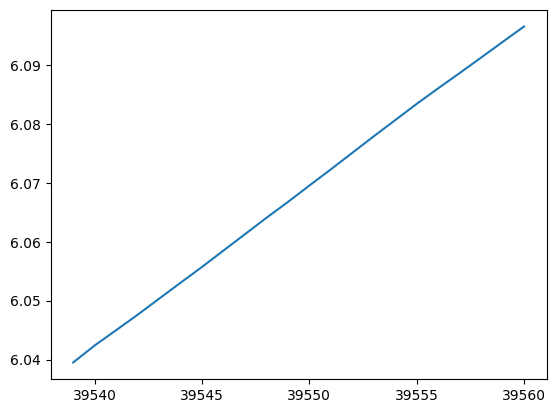

In [12]:
fundo_especifico = informes_diarios[informes_diarios['CNPJ_FUNDO'] == '07.593.972/0001-86']

fundo_especifico.VL_QUOTA.plot()

(CLMRA93) fundo_especifico = informes_diarios[informes_diarios['CNPJ_FUNDO'] == '07.593.972/0001-86']

fundo_especifico.VL_QUOTA.plot()

Com este comando estamos plotando as informações a respeito do CNPJ referido no codigo.
A primeira linha do código traz as informações do fundo, dia a dia, com as variaveis da cota.
Já na segunda linha, se cria o gráfico com as informações dessa cota.

SICREDI - FUNDO DE INVESTIMENTO EM AÇÕES PETROBRAS

CNPJ: '08.336.054/0001-34'

<Axes: >

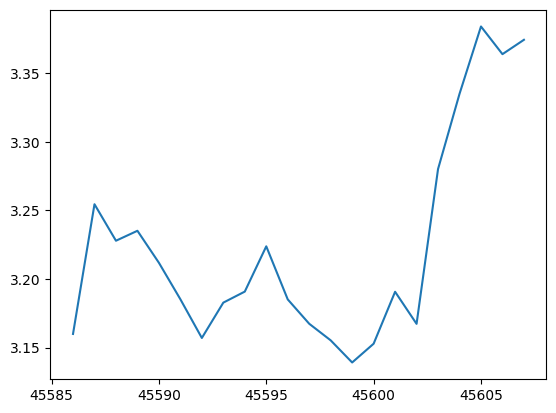

In [13]:
fundo_especifico = informes_diarios[informes_diarios['CNPJ_FUNDO'] == '08.336.054/0001-34']

fundo_especifico.VL_QUOTA.plot()

(CLMRA93) Aqui mais um exemplo de plotagem de cota de determinado CNPJ.

##### Transformando a data em índice

In [14]:
comparativo.index = comparativo['DT_COMPTC']

(CLMRA93) Com esse código, o valor da coluna DT_COMPTC que é a data, passa a ser o índice.

In [15]:
comparativo

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST
DT_COMPTC,,,,,,,,,
2024-01-31,FI,00.017.024/0001-53,2024-01-31,1.143345e+06,34.559634,1.145606e+06,0.0,0.00,1
2024-01-31,FI,00.068.305/0001-35,2024-01-31,3.782584e+07,35.665634,3.781537e+07,0.0,15484.51,5992
2024-01-31,FI,00.071.477/0001-68,2024-01-31,1.648170e+09,12.720100,1.648031e+09,17084.8,13217676.57,45157
2024-01-31,FI,00.073.041/0001-08,2024-01-31,9.202277e+06,37.575153,9.186091e+06,0.0,0.00,787
2024-01-31,FI,00.083.181/0001-67,2024-01-31,1.898866e+10,919.066498,1.898839e+10,0.0,0.00,4
...,...,...,...,...,...,...,...,...,...
2024-01-31,FI,97.548.164/0001-90,2024-01-31,6.210400e+07,0.158840,6.162196e+07,0.0,0.00,1
2024-01-31,FI,97.548.167/0001-23,2024-01-31,3.716845e+09,4.938655,3.947038e+09,410000.0,0.00,11
2024-01-31,FI,97.711.801/0001-05,2024-01-31,9.222887e+07,3.150975,9.008825e+07,0.0,0.00,1


In [16]:
comparativo.index = pd.to_datetime(comparativo.index)

(CLMRA93) Aqui eu informo ao Python que o index é data, e não objeto.

In [17]:
comparativo.index

DatetimeIndex(['2024-01-31', '2024-01-31', '2024-01-31', '2024-01-31',
               '2024-01-31', '2024-01-31', '2024-01-31', '2024-01-31',
               '2024-01-31', '2024-01-31',
               ...
               '2024-01-31', '2024-01-31', '2024-01-31', '2024-01-31',
               '2024-01-31', '2024-01-31', '2024-01-31', '2024-01-31',
               '2024-01-31', '2024-01-31'],
              dtype='datetime64[ns]', name='DT_COMPTC', length=25845, freq=None)

# **2. Trabalhando com dados cadastrais**

In [18]:
url = "http://dados.cvm.gov.br/dados/FI/CAD/DADOS/cad_fi.csv"

In [19]:
cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')

<ipython-input-19-c85bfb431447>:1: DtypeWarning: Columns (14,17,18,20,22,24,27,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  cadastral = pd.read_csv(url, sep = ';', encoding = 'ISO-8859-1')


(CLMRA93) Esse código permite a extração de informações cadastrais dos fundos. Cadastral é a variável, pd a biblioteca pandas, read informa que o que eu quero da biblioteca é o movimento de leitura, csv informa o tipo de arquivo. A informação vai ser extraída da url informada na variável url, listada logo acima, e mencionada nesse código. O encoding é um paramêtro para que os caracteres especiais que a cvm utiliza sejam lidos corretamente.
No código abaixo eu chamei a variavel criada acima para que seja visto as informações cadastrais.

In [24]:
cadastral

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
0,FACFIF,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,2003-04-30,1994-12-20,19.0,2000-08-01,CANCELADA,2000-08-01,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FACFIF,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,2003-04-30,1994-05-18,40681.0,1996-01-26,CANCELADA,1996-01-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FACFIF,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,2003-04-30,1994-05-24,27.0,1999-09-03,CANCELADA,1999-09-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FACFIF,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,2003-04-30,1994-05-23,40690.0,1996-06-10,CANCELADA,1996-06-10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FACFIF,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,2003-04-30,1994-05-12,35.0,2000-06-26,CANCELADA,2000-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76665,FUNCINE,31.674.280/0001-47,MEDIA VENTURE ESG INCENTIVADO - FUNDO DE FINAN...,2018-10-26,2018-09-13,418001.0,2023-07-21,CANCELADA,2023-07-21,NaN,...,09.544.103/0001-97,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.,16.549.480/0001-84,RSM BRASIL AUDITORES INDEPENDENTES LTDA.,16.695.922/0001-09,ID CORRETORA DE TITULOS E VALORES MOBILIARIOS ...,NaN,NaN,NaN,NaN
76666,FUNCINE,32.222.962/0001-81,Fundo de Financiamento da Indústria Cinematogr...,2018-12-20,2018-11-14,418002.0,2021-10-29,CANCELADA,2021-10-29,NaN,...,09.544.103/0001-97,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,15.489.568/0001-95,INTRA INVESTIMENTOS DTVM LTDA,NaN,NaN,NaN,NaN
76667,FUNCINE,48.879.897/0001-00,FUNDO DE FINANCIAMENTO DA INDÚSTRIA CINEMATOG...,2022-12-13,2022-12-01,422001.0,NaN,FASE PRÉ-OPERACIONAL,2022-12-13,2022-12-13,...,18.190.296/0001-16,CEDRO ASSET MANAGEMENT LTDA,19.280.834/0001-26,NEXT AUDITORES INDEPENDENTES S/S LTDA.,16.695.922/0001-09,ID CORRETORA DE TITULOS E VALORES MOBILIARIOS ...,NaN,NaN,NaN,NaN
76668,FUNCINE,52.714.528/0001-26,INVESTIMAGE 4 - FUNDO DE FINANCIAMENTO DA INDÚ...,2023-10-30,2023-10-17,423001.0,NaN,EM FUNCIONAMENTO NORMAL,2023-12-28,2023-12-28,...,09.544.103/0001-97,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.,19.280.834/0001-26,NEXT AUDITORES INDEPENDENTES S/S LTDA.,16.695.922/0001-09,ID CORRETORA DE TITULOS E VALORES MOBILIARIOS ...,NaN,NaN,NaN,NaN


In [20]:
cadastral[cadastral['CNPJ_FUNDO'] == '07.593.972/0001-86']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
12166,FI,07.593.972/0001-86,BRASILPREV TOP TPF FUNDO DE INVESTIMENTO RENDA...,2005-09-19,2005-09-13,62324.0,NaN,EM FUNCIONAMENTO NORMAL,2005-09-21,2005-09-21,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência RF Duração Baixa Soberano


(CLMRA93) Neste código é visto a informação cadastral com filtro pelo CNPJ. Assim tendo as informações cadastrais do fundo referente ao CNPJ listado.

In [21]:
cadastral[cadastral['DENOM_SOCIAL'].str.contains('ALASKA')]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
4259,FACFIF,05.365.711/0001-83,ALASKA FUNDO DE INVESTIMENTO EM COTAS DE FUNDO...,2003-04-30,2003-04-09,40274.0,2005-03-21,CANCELADA,2005-03-21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9701,FI,05.365.711/0001-83,ALASKA FUNDO DE INVESTIMENTO EM COTAS DE FUNDO...,2005-04-01,2003-04-09,45349.0,2015-08-27,CANCELADA,2015-08-27,2003-04-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
10386,FI,05.775.774/0001-08,ALASKA POLAND FUNDO DE INVESTIMENTO DE AÇÕES -...,2005-03-30,2003-06-10,40894.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-16,2003-08-01,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Índice Ativo
17012,FI,09.510.882/0001-00,ALASKA CASH FUNDO DE INVESTIMENTO RENDA FIXA C...,2008-05-05,2008-04-16,107808.0,2021-05-11,CANCELADA,2021-05-11,2008-05-13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
20639,FI,12.055.107/0001-16,ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM A...,2010-07-31,2010-06-02,145238.0,NaN,EM FUNCIONAMENTO NORMAL,2010-09-17,2010-09-17,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
21691,FI,12.987.743/0001-86,ALASKA BLACK FUNDO DE INVESTIMENTO EM COTAS DE...,2011-01-12,2011-01-12,154849.0,NaN,EM FUNCIONAMENTO NORMAL,2011-01-24,2011-01-24,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Ações Livre
21747,FI,13.001.211/0001-90,ALASKA RANGE FUNDO DE INVESTIMENTO MULTIMERCADO,2011-02-14,2011-02-03,156302.0,NaN,EM FUNCIONAMENTO NORMAL,2011-02-14,2011-02-14,...,11.752.203/0001-50,ALASKA INVESTIMENTOS LTDA.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Multimercados Macro
26416,FI,17.634.258/0001-42,ALFA ALASKA RANGE - FIC FI MULTIMERCADO - IQ,2017-08-02,2013-01-28,283118.0,2020-09-17,CANCELADA,2020-09-17,2017-08-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
26420,FI,17.634.289/0001-01,ALFA ALASKA BLACK - FIC FI EM AÇÕES - BDR NÍV...,2017-08-02,2013-01-28,283100.0,2017-12-13,CANCELADA,2017-12-13,2017-08-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
28196,FI,19.154.058/0001-18,ALFA ALASKA - FIC DE FI MULTIMERCADO - CRÉDITO...,2017-08-25,2013-10-16,284866.0,2021-09-24,CANCELADA,2021-09-24,2017-08-31,...,60.770.336/0001-65,BANCO ALFA DE INVESTIMENTO S.A.,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,NaN


(CLMRA93) Neste filtro é possível verificar informações cadastrais com filtro pelo nome. Logo, todo fundo que tenha Alaska no nome está sendo listado com esse filtro. Abaixo refiz a analise com o nome Brasil. Então vemos todos os fundos que tenham Brasil no nome.

In [25]:
cadastral[cadastral['DENOM_SOCIAL'].str.contains('BRASIL')]

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
241,FACFIF,00.821.353/0001-52,INDUSTRIAL BRASIL FDO DE APLIC QUOTAS FDO INV ...,2003-04-30,1995-10-02,2097.0,1996-02-02,CANCELADA,1996-02-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,FACFIF,00.830.599/0001-90,BRASIL PLURAL BANESE EXPERT FUNDO DE INVESTIME...,2003-04-30,1995-10-02,2798.0,2003-04-30,CANCELADA,2003-04-30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,FACFIF,00.952.692/0001-78,MULTIMARCAS BRASILIA I FUNDO DE APLICACAO EM Q...,2003-04-30,1995-12-07,4316.0,2003-10-16,CANCELADA,2003-10-16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1131,FACFIF,01.597.964/0001-21,GUIDE BRASIL PLURAL HIGH YIELD FIC DE FUNDOS D...,2003-04-30,1997-01-02,10260.0,2005-04-15,CANCELADA,2005-04-15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1570,FACFIF,02.242.237/0001-04,FAQFI PACTUAL CAMBIAL BRASIL JAPAO 60,2003-04-30,1998-01-13,14443.0,1998-10-23,CANCELADA,1998-10-23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76565,FMP-FGTS,05.359.029/0001-88,BRADESCO FMP-FGTS BANCO DO BRASIL - PRIVATE,2002-11-05,2002-10-31,1120.0,2003-01-03,CANCELADA,2003-01-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76566,FMP-FGTS,05.359.033/0001-46,BCN FMP-FGTS BANCO DO BRASIL,2002-11-05,2002-10-31,1104.0,2003-01-03,CANCELADA,2003-01-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76567,FMP-FGTS,05.359.046/0001-15,FINASA FMP-FGTS BANCO DO BRASIL,2002-11-05,2002-10-31,1139.0,2003-01-03,CANCELADA,2003-01-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76572,FMP-FGTS,05.359.497/0001-52,BANESPA FMP-FGTS BANCO DO BRASIL,2002-11-04,2002-10-31,1074.0,2003-01-03,CANCELADA,2003-01-03,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(CLMR93) Ao verificar que a listagem apareceu diversos fundos já cancelados, tive a ideia de filtrar então pela situação cadastral, e assim ver os fundos que tenham Brasil no nome, e que estejam em situação normal de funcionamento. Logo abaixo você vê o código que utilizei para esse filtro.

In [27]:
cadastral[cadastral['DENOM_SOCIAL'].str.contains('BRASIL')][cadastral['SIT'].str.contains('EM FUNCIONAMENTO NORMAL')]

<ipython-input-27-5184c9d9d496>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cadastral[cadastral['DENOM_SOCIAL'].str.contains('BRASIL')][cadastral['SIT'].str.contains('EM FUNCIONAMENTO NORMAL')]


,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
6139,FI,02.143.194/0001-00,BRASIL PLURAL FUNDO DE INVESTIMENTO ENERGIE RE...,2005-03-22,1997-11-20,32638.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-21,1997-11-20,...,11.397.672/0002-80,PLURAL GESTÃO DE RECURSOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,60.746.948/0001-12,BANCO BRADESCO S.A.,60.746.948/0001-12,BANCO BRADESCO S.A.,N,Renda Fixa Duração Livre Grau de Invest.
6161,FI,02.190.541/0001-55,BRASILSEG ATIVO FUNDO DE INVESTIMENTO RENDA FIXA,2005-04-05,1997-11-13,47015.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-28,1997-11-13,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Renda Fixa Duração Livre Soberano
7070,FI,03.537.355/0001-02,BRASILPREV MULTIMERCADO DINÂMICO I FUNDO DE IN...,2005-04-13,2000-10-02,53767.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-31,2000-10-02,...,27.665.207/0001-31,BRASILPREV SEGUROS E PREVIDÊNCIA S.A,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência Balanceados de 15-30
7071,FI,03.537.367/0001-37,BRASILPREV MULTIMERCADO DINÂMICO IV FUNDO DE I...,2005-04-13,1999-12-02,53880.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-31,1999-12-02,...,27.665.207/0001-31,BRASILPREV SEGUROS E PREVIDÊNCIA S.A,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência Balanceados de 15-30
7072,FI,03.537.379/0001-61,BRASILPREV RT FIX FUNDO DE INVESTIMENTO EM COT...,2005-04-13,2000-05-08,53821.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-31,2000-05-08,...,27.665.207/0001-31,BRASILPREV SEGUROS E PREVIDÊNCIA S.A,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Previdência RF Duração Livre Grau de Inv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74193,FIP,51.209.718/0001-23,PÁTRIA INFRAESTRUTURA V FEEDER BRASIL FUNDO DE...,2023-06-27,2023-06-23,123143.0,NaN,EM FUNCIONAMENTO NORMAL,2024-01-26,2024-01-26,...,12.461.756/0001-17,PÁTRIA INVESTIMENTOS LTDA.,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,36.113.876/0001-91,OLIVEIRA TRUST DTVM S.A.,NaN,NaN,NaN,NaN
74230,FIP,51.719.263/0001-96,INVEST BRASIL FUNDO DE INVESTIMENTO EM PARTICI...,2023-08-07,2023-08-07,123179.0,NaN,EM FUNCIONAMENTO NORMAL,2023-09-27,2023-09-27,...,47.982.937/0001-73,RUBY CAPITAL GESTÃO E ADMINISTRAÇÃO DE RECURSO...,19.280.834/0001-26,NEXT AUDITORES INDEPENDENTES S/S LTDA.,NaN,NaN,NaN,NaN,NaN,NaN
74253,FIP,51.931.205/0001-21,SPORTS MEDIA FUTEBOL BRASILEIRO ADVISORY FUNDO...,2023-08-23,2023-08-23,123201.0,NaN,EM FUNCIONAMENTO NORMAL,2023-10-24,2023-10-24,...,19.395.898/0001-72,XP SPORTS ASSET MANAGEMENT LTDA,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,36.113.876/0001-91,OLIVEIRA TRUST DTVM S.A.,NaN,NaN,NaN,NaN
74262,FIP,52.019.407/0001-64,SPORTS MEDIA FUTEBOL BRASILEIRO FUNDO DE INVES...,2023-08-30,2023-08-30,123210.0,NaN,EM FUNCIONAMENTO NORMAL,2023-11-03,2023-11-03,...,46.382.187/0001-36,LCP GESTORA DE RECURSOS LTDA,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,36.113.876/0001-91,OLIVEIRA TRUST DTVM S.A.,NaN,NaN,NaN,NaN


(CLMRA93) Com esse filtro foi possível ver que há 865 linhas de informações de fundos que tenham nome Brasil.

In [22]:
cadastral_relevantes = cadastral[['CNPJ_FUNDO',	'DENOM_SOCIAL', 'GESTOR']]

(CLMRA93) Nesse filtro é possível definir quais informações quero ver no dataframe. No caso, foi armazenado em uma nova variável, chamada cadastral_relevantes.

In [23]:
cadastral_relevantes

,CNPJ_FUNDO,DENOM_SOCIAL,GESTOR
0,00.000.684/0001-21,DEUTSCHE BANK FDO APLIC QUOTAS FDO INV FINANCE...,NaN
1,00.000.731/0001-37,ITAMARITI CASH FUNDO APLICACAO QUOTAS FDOS INV...,NaN
2,00.000.732/0001-81,FUNDO APLIC. QUOTAS DE F.I. SANTANDER CURTO PRAZO,NaN
3,00.000.740/0001-28,FUNDO DE APLIC EM QUOTAS DE FUNDOS DE INV BMC ...,NaN
4,00.000.749/0001-39,BALANCE FUNDO APLICACAO QUOTAS FUNDO INVESTIME...,NaN
...,...,...,...
76665,31.674.280/0001-47,MEDIA VENTURE ESG INCENTIVADO - FUNDO DE FINAN...,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.
76666,32.222.962/0001-81,Fundo de Financiamento da Indústria Cinematogr...,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.
76667,48.879.897/0001-00,FUNDO DE FINANCIAMENTO DA INDÚSTRIA CINEMATOG...,CEDRO ASSET MANAGEMENT LTDA
76668,52.714.528/0001-26,INVESTIMAGE 4 - FUNDO DE FINANCIAMENTO DA INDÚ...,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.


(CLMR93) Para análise de informações utilizando a mesma ideia do filtro anterior, pensei em acrescentar a informação de situação dos fundos, adicionando também o filtro para que mostre apenas as de situação normal de funcionamento. Logo abaixo você vê os códigos que criei para que essa análise fosse feita.

In [34]:
cadastral_relevantes = cadastral[['CNPJ_FUNDO',	'DENOM_SOCIAL', 'GESTOR','SIT']]

In [36]:
cadastral_relevantes[cadastral['SIT'].str.contains('EM FUNCIONAMENTO NORMAL')]

,CNPJ_FUNDO,DENOM_SOCIAL,GESTOR,SIT
5003,06.537.068/0001-90,AMAZÔNIA CREDIT 90 - FUNDO DE APLICAÇÃO EM QUO...,NaN,EM FUNCIONAMENTO NORMAL
5044,07.408.147/0001-64,FUNDO AMAZONIA DE APLICAÇÃO EM COTAS DE FUNDO ...,NaN,EM FUNCIONAMENTO NORMAL
5214,02.010.153/0001-45,BB FAPI FUNDO DE APOSENTADORIA PROGRAMADA INDI...,NaN,EM FUNCIONAMENTO NORMAL
5216,02.177.812/0001-32,ITAU FAPI RENDA FIXA - FUNDO DE APOSENTADORIA ...,NaN,EM FUNCIONAMENTO NORMAL
5217,02.177.815/0001-76,ITAU FAPI CONSERVADOR - FUNDO DE APOSENTADORIA...,NaN,EM FUNCIONAMENTO NORMAL
...,...,...,...,...
76640,06.905.783/0001-39,INVESTIMAGE 2 - FUNDO DE FINANCIAMENTO DA INDÚ...,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.,EM FUNCIONAMENTO NORMAL
76641,07.644.864/0001-95,CINE AA FUNCINE,ACURA GESTORA DE RECURSOS LTDA,EM FUNCIONAMENTO NORMAL
76646,10.500.895/0001-87,INVESTIMAGE 1 FUNDO DE FINANCIAMENTO DA INDUST...,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.,EM FUNCIONAMENTO NORMAL
76663,28.850.140/0001-78,FUNDO DE FINANCIAMENTO DA INDUSTRIA CINEMATOGR...,INVESTIMAGE ADMINISTRADORA DE RECURSOS LTDA.,EM FUNCIONAMENTO NORMAL


## Manipulações nas informações dos fundos

In [41]:
fundos = informes_diarios.merge(cadastral_relevantes, how = 'left', on ='CNPJ_FUNDO')

fundos.head()

,TP_FUNDO,CNPJ_FUNDO,DT_COMPTC,VL_TOTAL,VL_QUOTA,VL_PATRIM_LIQ,CAPTC_DIA,RESG_DIA,NR_COTST,DENOM_SOCIAL,GESTOR,SIT
0,FI,00.017.024/0001-53,2024-01-02,1136699.13,34.298860,1139708.10,0.0,0.0,1,FUNDO DE INVESTIMENTO RENDA FIXA EXPONENCIAL,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,EM FUNCIONAMENTO NORMAL
1,FI,00.017.024/0001-53,2024-01-02,1136699.13,34.298860,1139708.10,0.0,0.0,1,FUNDO DE INVESTIMENTO RENDA FIXA EXPONENCIAL,NaN,CANCELADA
2,FI,00.017.024/0001-53,2024-01-03,1137245.82,34.312303,1140154.80,0.0,0.0,1,FUNDO DE INVESTIMENTO RENDA FIXA EXPONENCIAL,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,EM FUNCIONAMENTO NORMAL
3,FI,00.017.024/0001-53,2024-01-03,1137245.82,34.312303,1140154.80,0.0,0.0,1,FUNDO DE INVESTIMENTO RENDA FIXA EXPONENCIAL,NaN,CANCELADA
4,FI,00.017.024/0001-53,2024-01-04,1137741.93,34.326023,1140610.71,0.0,0.0,1,FUNDO DE INVESTIMENTO RENDA FIXA EXPONENCIAL,BRAM - BRADESCO ASSET MANAGEMENT S.A. DISTRIBU...,EM FUNCIONAMENTO NORMAL


(CLMRA93) Aqui foi feita a junção das tabelas que trazem informações de valores dos fundos, com a tabela de informes cadastrais.

In [42]:
filtro = informes_diarios[informes_diarios['NR_COTST'] > 1000]

(CLMRA93) Neste código colocamos um filtro para fundos que tenham mais de 1000 cotistas.

In [43]:
desempenho = filtro.pivot(index = 'DT_COMPTC', columns = 'CNPJ_FUNDO', values = ['VL_QUOTA'])

(CLMRA93) Neste filtro o método pivot, altera a ordem das colunas, nesse caso mostrando a variação da cota por CNPJ.

In [44]:
desempenho

VL_QUOTA                                        \
CNPJ_FUNDO 00.068.305/0001-35 00.071.477/0001-68 00.222.816/0001-60   
DT_COMPTC                                                             
2024-01-02          35.360849          12.622172       10273.180894   
2024-01-03          35.373998          12.626955       10278.281339   
2024-01-04          35.386270          12.632013       10280.913671   
2024-01-05          35.398927          12.636305       10284.294193   
2024-01-08          35.412490          12.640941       10287.231958   
2024-01-09          35.425732          12.645638       10290.158562   
2024-01-10          35.442513          12.650194       10294.161193   
2024-01-11          35.459246          12.654874       10299.009452   
2024-01-12          35.475477          12.659580       10303.172494   
2024-01-15          35.490908          12.664231       10307.482440   
2024-01-16          35.505122          12.668944       10309.783053   
2024-01-17          35.520161          12.673566       10313.515038   
2024-01-18          35.534621          12.678345       10316.616926   
2024-01-19          35.548462          12.683056       10321.537427   
2024-01-22          35.562010          12.687760       10324.342115   
2024-01-23          35.577032          12.692432       10330.093325   
2024-01-24          35.591828          12.697068       10335.162983   
2024-01-25          35.607277          12.701717       10341.991735   
2024-01-26          35.620980          12.706260       10347.756286   
2024-01-29          35.635258          12.710869       10349.255106   
2024-01-30          35.649652          12.715493       10351.730543   
2024-01-31          35.665634          12.720100       10357.607367   

                                                                     \
CNPJ_FUNDO 00.280.302/0001-60 00.306.278/0001-91 00.322.699/0001-06   
DT_COMPTC                                                             
2024-01-02        6336.323005          25.356678          18.163212   
2024-01-03        6339.359182          25.366332          18.170376   
2024-01-04        6342.112772          25.377877          18.180709   
2024-01-05        6345.041117          25.390053          18.188546   
2024-01-08        6347.426691          25.400369          18.196831   
2024-01-09        6349.799632          25.411342          18.204622   
2024-01-10        6352.156320          25.421880          18.212638   
2024-01-11        6356.654763          25.432848          18.221754   
2024-01-12        6359.990198          25.449430          18.235361   
2024-01-15        6362.877737          25.460827          18.243993   
2024-01-16        6364.045986          25.472317          18.252560   
2024-01-17        6366.254544          25.485508          18.263033   
2024-01-18        6369.155906          25.497161          18.271938   
2024-01-19        6372.294524          25.508853          18.281042   
2024-01-22        6374.745849          25.526951          18.296090   
2024-01-23        6378.742467          25.537855          18.304470   
2024-01-24        6381.422345          25.555731          18.315918   
2024-01-25        6384.645204          25.567829          18.324601   
2024-01-26        6387.230721          25.578792          18.333214   
2024-01-29        6389.501843          25.589501          18.341750   
2024-01-30        6391.623958          25.600524          18.350649   
2024-01-31        6394.707975          25.611742          18.359079   

                                                                     \
CNPJ_FUNDO 00.360.293/0001-18 00.398.561/0001-90 00.400.490/0001-13   
DT_COMPTC                                                             
2024-01-02          27.998767         209.204886       54700.619198   
2024-01-03          27.935492         209.113321       54599.717180   
2024-01-04          27.834980         205.595722       54579.505155   
2024-01-05          27.611390         207.7

# **3. Encontrando os fundos que mais subiram**

In [45]:
normalizado = desempenho/desempenho.iloc[0]

(CLMRA93) A partir daqui, padroniza os fundos para compara-los entre si. No caso, normalizando as cotas.

In [46]:
cotas_normalizadas = pd.DataFrame(normalizado.iloc[-1])

(CLMRA93) Com esse código, conseguimos ver os fundos que mais renderam.

In [47]:
cotas_normalizadas

2024-01-31
         CNPJ_FUNDO                    
VL_QUOTA 00.068.305/0001-35    1.008619
         00.071.477/0001-68    1.007758
         00.222.816/0001-60    1.008218
         00.280.302/0001-60    1.009214
         00.306.278/0001-91    1.010059
...                                 ...
         73.899.759/0001-21    0.961654
         88.002.696/0001-36    0.964827
         88.198.056/0001-43    0.954139
         97.519.703/0001-62    1.012535
         97.519.794/0001-36    1.009493

[1516 rows x 1 columns]

In [48]:
cotas_normalizadas.sort_values('2024-01-31', ascending = False)[:5]

2024-01-31
         CNPJ_FUNDO                    
VL_QUOTA 34.218.740/0001-10    1.141484
         40.503.169/0001-89    1.116340
         30.068.049/0001-47    1.103126
         10.590.125/0001-72    1.091648
         10.869.628/0001-81    1.090966

(CLMRA93) Aqui filtro para ver os 5 fundos que mais cresceram no mês.

Fundo que mais subiu

In [49]:
cadastral[cadastral['CNPJ_FUNDO'] == '34.218.740/0001-10']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
40096,FI,34.218.740/0001-10,TREND CANNABIS FUNDO DE INVESTIMENTO MULTIMERCADO,2019-11-27,2019-06-27,344443.0,NaN,EM FUNCIONAMENTO NORMAL,2019-12-13,2019-12-13,...,37.918.829/0001-88,XP ALLOCATION ASSET MANAGEMENT LTDA.,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,42.272.526/0001-70,BNY MELLON BANCO S.A.,02.201.501/0001-61,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,N,Multimercados Livre


Segundo melhor fundo

In [50]:
cadastral[cadastral['CNPJ_FUNDO'] == '40.503.169/0001-89']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
46399,FI,40.503.169/0001-89,VITREO URANIO FUNDO DE INVESTIMENTO MULTIMERCADO,2021-01-29,2021-01-29,393320.0,NaN,EM FUNCIONAMENTO NORMAL,2021-01-29,2021-01-29,...,06.195.084/0001-42,EMPIRICUS GESTÃO DE RECURSOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Multimercados Livre


## **Dever de casa: repetir esse raciocínio e trazer os 5 fundos que mais caíram em janeiro**

(CLMRA93) Aqui foi proposto que utilizemos um filtro para encontrar os 5 fundos que mais caíram em Janeiro. Encontrei os fundos, e utilizei um filtro para apresentar as informações cadastrais destes.

In [90]:
cotas_normalizadas

2024-01-31
         CNPJ_FUNDO                    
VL_QUOTA 00.068.305/0001-35    1.008619
         00.071.477/0001-68    1.007758
         00.222.816/0001-60    1.008218
         00.280.302/0001-60    1.009214
         00.306.278/0001-91    1.010059
...                                 ...
         73.899.759/0001-21    0.961654
         88.002.696/0001-36    0.964827
         88.198.056/0001-43    0.954139
         97.519.703/0001-62    1.012535
         97.519.794/0001-36    1.009493

[1516 rows x 1 columns]

In [91]:
cotas_normalizadas.sort_values('2024-01-31', ascending = True)[:5]

2024-01-31
         CNPJ_FUNDO                    
VL_QUOTA 41.373.608/0001-49    0.824669
         43.617.507/0001-00    0.866048
         04.881.177/0001-03    0.877312
         04.895.210/0001-46    0.877966
         04.885.820/0001-69    0.878223

In [92]:
cadastral[cadastral['CNPJ_FUNDO'] == '41.373.608/0001-49']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
47502,FI,41.373.608/0001-49,VITREO CARBONO FUNDO DE INVESTIMENTO MULTIMERCADO,2021-04-12,2021-04-09,404667.0,NaN,EM FUNCIONAMENTO NORMAL,2021-04-27,2021-04-27,...,06.195.084/0001-42,EMPIRICUS GESTÃO DE RECURSOS LTDA,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,30.306.294/0001-45,BANCO BTG PACTUAL S/A,59.281.253/0001-23,BTG PACTUAL SERVIÇOS FINANCEIROS S/A DTVM,N,Multimercados Livre


In [93]:
cadastral[cadastral['CNPJ_FUNDO'] == '43.617.507/0001-00']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
50972,FI,43.617.507/0001-00,BB MULTIMERCADO CARBONO LONGO PRAZO FUNDO DE I...,2022-05-16,2022-05-13,459682.0,NaN,EM FUNCIONAMENTO NORMAL,2022-05-19,2022-05-19,...,30.822.936/0001-69,BB GESTAO DE RECURSOS DTVM S.A,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.000.000/0001-91,BANCO DO BRASIL S.A.,00.000.000/0001-91,BANCO DO BRASIL S.A.,N,Multimercados Estrat. Específica


In [97]:
cadastral[cadastral['CNPJ_FUNDO'] == '04.881.177/0001-03']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
8837,FI,04.881.177/0001-03,ITAÚ AÇÕES VALE - FUNDO DE INVESTIMENTO EM COT...,2005-04-05,2002-02-07,47287.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-28,2002-02-20,...,40.430.971/0001-96,ITAU UNIBANCO ASSET MANAGEMENT LTDA.,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.,60.701.190/0001-04,ITAU UNIBANCO S.A.,60.701.190/0001-04,ITAU UNIBANCO S.A.,N,Fundos de Mono Ação
75142,FITVM,04.881.177/0001-03,ITAÚ AÇÕES VALE - FUNDO DE INVESTIMENTO EM COT...,2002-02-20,2002-02-07,6815.0,2005-03-28,CANCELADA,2005-03-28,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
cadastral[cadastral['CNPJ_FUNDO'] == '04.895.210/0001-46']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
8885,FI,04.895.210/0001-46,SANTANDER VALE AÇÕES FI,2005-04-14,2002-02-20,54771.0,NaN,EM FUNCIONAMENTO NORMAL,2005-03-31,2002-02-20,...,10.231.177/0001-52,SANTANDER BRASIL GESTÃO DE RECURSOS LTDA,61.562.112/0001-20,PRICEWATERHOUSECOOPERS AUDITORES INDEPENDENTES...,62.318.407/0001-19,S3 CACEIS BRASIL DISTRIBUIDORA DE TITULOS E VA...,62.318.407/0001-19,S3 CACEIS BRASIL DISTRIBUIDORA DE TITULOS E VA...,N,Fundos de Mono Ação
75158,FITVM,04.895.210/0001-46,SANTANDER VALE AÇÕES FI,2002-02-20,2002-02-20,6858.0,2005-03-31,CANCELADA,2005-03-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
cadastral[cadastral['CNPJ_FUNDO'] == '04.885.820/0001-69']

,TP_FUNDO,CNPJ_FUNDO,DENOM_SOCIAL,DT_REG,DT_CONST,CD_CVM,DT_CANCEL,SIT,DT_INI_SIT,DT_INI_ATIV,...,CPF_CNPJ_GESTOR,GESTOR,CNPJ_AUDITOR,AUDITOR,CNPJ_CUSTODIANTE,CUSTODIANTE,CNPJ_CONTROLADOR,CONTROLADOR,INVEST_CEMPR_EXTER,CLASSE_ANBIMA
8858,FI,04.885.820/0001-69,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA VALE DO R...,2004-12-22,2002-02-08,1023.0,NaN,EM FUNCIONAMENTO NORMAL,2004-12-02,2002-02-20,...,42.040.639/0001-40,CAIXA DISTRIBUIDORA DE TÍTULOS E VALORES MOBIL...,49.928.567/0001-11,DELOITTE TOUCHE TOHMATSU AUDITORES INDEPENDENT...,00.360.305/0001-04,CAIXA ECONOMICA FEDERAL,00.360.305/0001-04,CAIXA ECONOMICA FEDERAL,N,Fundos de Mono Ação
75148,FITVM,04.885.820/0001-69,FUNDO DE INVESTIMENTO EM AÇÕES CAIXA VALE DO R...,2002-02-20,2002-02-08,6823.0,2004-12-02,CANCELADA,2004-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
